In [114]:
# https://fastballs.wordpress.com/2007/08/02/glossary-of-the-gameday-pitch-fields/

import numpy as np
import pandas as pd
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [2]:
pd.set_option('display.max_columns', None)

df_atbats = pd.read_csv('atbats.csv')
df_pitches = pd.read_csv('pitches.csv')
df_games = pd.read_csv('games.csv')

In [3]:
df_atbats_2019 = pd.read_csv('2019_atbats.csv')
df_pitches_2019 = pd.read_csv('2019_pitches.csv')

In [4]:
df_atbats.head(10)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True
5,2015000006,451594,Double,201500001,1,0,1,R,425794,L,False
6,2015000007,624585,Groundout,201500001,1,1,1,R,425794,R,False
7,2015000008,519203,Strikeout,201500001,1,2,1,R,425794,L,False
8,2015000009,516770,Groundout,201500001,1,3,1,R,425794,R,False
9,2015000010,425877,Strikeout,201500001,2,1,0,L,452657,R,True


In [5]:
df_atbats_2019.head()

,inning,top,ab_id,g_id,p_score,batter_id,pitcher_id,stand,p_throws,event,o
0,1.0,1.0,2.019000e+09,201900001.0,0.0,594777,571666,L,R,Flyout,1
1,1.0,1.0,2.019000e+09,201900001.0,0.0,545361,571666,R,R,Flyout,2
2,1.0,1.0,2.019000e+09,201900001.0,0.0,571506,571666,L,R,Groundout,3
3,1.0,0.0,2.019000e+09,201900001.0,0.0,543257,502239,L,R,Single,0
4,1.0,0.0,2.019000e+09,201900001.0,0.0,656305,502239,R,R,Flyout,1


In [6]:
df_pitches.head(10)

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,34.685,-11.960,1.72,3.56,2.000,-6.409,-136.065,-3.995,101.140000,2.280,158.780000,50.0,5.302,4.16,10.93,55.0,3.0,C,S,FF,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,34.225,-10.085,1.72,3.56,2.000,-8.411,-135.690,-5.980,124.280000,2.119,175.410000,50.0,5.307,6.57,12.00,31.0,5.0,S,S,FF,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,35.276,-11.560,1.72,3.56,2.000,-9.802,-137.668,-3.337,136.740000,2.127,150.110000,50.0,5.313,7.61,10.88,49.0,1.0,F,S,FF,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,28.354,-20.540,1.74,3.35,2.000,-8.071,-133.005,-6.567,109.685636,2.279,187.463482,50.0,5.210,1.17,6.45,41.0,13.0,B,B,FF,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,21.774,-34.111,1.72,3.56,2.000,-6.309,-110.409,0.325,146.527525,2.179,177.242829,50.0,5.557,-8.43,-1.65,18.0,13.0,B,B,CU,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0
5,0.627,2.397,92.9,84.8,2743.856,148.110,-45.7,3.7,23.7,13.590,32.274,-10.333,1.72,3.56,2.000,-6.943,-136.012,-5.738,118.004772,2.273,164.467012,50.0,5.264,7.32,11.72,42.0,6.0,X,X,FF,8,0.0,2.015000e+09,2.0,2.0,0.0,6.0,0.0,0.0,0.0
6,-1.088,1.610,93.3,85.3,2848.535,147.044,-46.3,3.6,23.7,14.549,31.469,-9.734,1.59,3.45,2.000,-11.032,-136.208,-7.762,141.430000,2.013,205.810000,50.0,5.179,7.79,11.97,80.0,13.0,B,B,FF,12,0.0,2.015000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,-0.257,2.047,89.3,82.4,1433.743,185.948,7.3,4.8,23.8,-1.339,27.421,-19.326,1.59,3.45,0.778,-6.335,-130.711,-4.611,186.410000,2.298,182.540000,50.0,5.284,-0.77,7.38,39.0,7.0,D,X,FC,13,0.0,2.015000e+09,1.0,0.0,1.0,2.0,0.0,0.0,0.0
8,1.470,2.350,92.1,85.0,2666.090,146.146,-45.0,4.0,23.8,13.808,28.169,-11.591,1.89,3.46,2.000,-5.075,-134.873,-5.723,93.100000,2.402,174.060000,50.0,5.310,7.46,11.09,42.0,14.0,B,B,FF,17,0.0,2.015000e+09,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,-1.337,1.898,89.3,82.0,1384.143,174.388,2.0,4.9,23.8,1.218,28.828,-19.782,1.81,3.52,0.648,-9.239,-130.512,-4.904,135.831493,2.165,182.991946,50.0,5.302,0.71,7.18,34.0,13.0,B,B,FF,18,0.0,2.015000e+09,1.0,0.0,1.0,2.0,0.0,1.0,0.0


In [7]:
df_pitches_2019.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,-8.47,28.90,-15.51,1.70,3.36,placeholder,5.28,-128.95,-6.89,116.97,-1.42,180.81,50.0,6.07,-5.07,9.98,NaN,placeholder,X,X,FF,5,0.0,2.019000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,-7.10,28.85,-12.99,1.80,3.55,placeholder,4.89,-130.54,-7.48,103.93,-1.02,176.34,50.0,6.20,-4.14,11.18,NaN,placeholder,C,C,FF,8,0.0,2.019000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,3.65,22.07,-22.64,1.59,3.55,placeholder,2.33,-124.60,-5.98,118.86,-1.29,183.96,50.0,6.30,2.30,5.99,NaN,placeholder,S,S,SL,9,0.0,2.019000e+09,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,-13.77,24.44,-25.74,1.74,3.55,placeholder,7.83,-123.74,-6.78,98.15,-1.56,214.03,50.0,5.85,-8.87,4.14,NaN,placeholder,B,B,CH,10,0.0,2.019000e+09,0.0,1.0,1.0,3.0,0.0,0.0,0.0
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,-15.99,24.56,-28.36,1.83,3.59,placeholder,6.79,-122.67,-5.73,121.81,-1.57,208.77,50.0,5.89,-10.51,2.51,NaN,placeholder,B,B,CH,11,0.0,2.019000e+09,1.0,1.0,1.0,4.0,0.0,0.0,0.0


# Preliminary Exploration

In [8]:
df_pitches['pitch_type'].unique()

array(['FF', 'CU', 'FC', 'SI', 'CH', 'FT', 'IN', 'SL', nan, 'KC', 'EP',
       'FS', 'FO', 'PO', 'KN', 'UN', 'SC', 'FA', 'AB'], dtype=object)

In [9]:
df_pitches['type'].unique()

array(['S', 'B', 'X'], dtype=object)

In [10]:
df_pitches['code'].unique()

array(['C', 'S', 'F', 'B', 'X', 'D', 'E', '*B', 'L', 'W', 'T', 'I', 'M',
       'H', 'P', 'V', 'Q', 'R', nan, 'Z'], dtype=object)

In [11]:
df_pitches.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867154 entries, 0 to 2867153
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   px               float64
 1   pz               float64
 2   start_speed      float64
 3   end_speed        float64
 4   spin_rate        float64
 5   spin_dir         float64
 6   break_angle      float64
 7   break_length     float64
 8   break_y          float64
 9   ax               float64
 10  ay               float64
 11  az               float64
 12  sz_bot           float64
 13  sz_top           float64
 14  type_confidence  float64
 15  vx0              float64
 16  vy0              float64
 17  vz0              float64
 18  x                float64
 19  x0               float64
 20  y                float64
 21  y0               float64
 22  z0               float64
 23  pfx_x            float64
 24  pfx_z            float64
 25  nasty            float64
 26  zone             float64
 27  code        

In [12]:
df_games.head()

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


# Cleaning Data

In [13]:
# Cleaning the atbats data
cols = ['inning', 'top', 'ab_id', 'g_id', 'p_score']

for c in cols:
    if c == 'top':
        df_atbats_2019[c] = df_atbats_2019[c].astype('bool')
    else:
        df_atbats_2019[c] = df_atbats_2019[c].astype('int64')
    
og_cols = df_atbats.columns.to_list()
df_atbats_2019 = df_atbats_2019[og_cols]
df_atbats_2019.head()

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2019000001,594777,Flyout,201900001,1,1,0,R,571666,L,True
1,2019000002,545361,Flyout,201900001,1,2,0,R,571666,R,True
2,2019000003,571506,Groundout,201900001,1,3,0,R,571666,L,True
3,2019000004,543257,Single,201900001,1,0,0,R,502239,L,False
4,2019000005,656305,Flyout,201900001,1,1,0,R,502239,R,False


In [14]:
# Cleaning the pitches data
df_pitches['ab_id'] = df_pitches['ab_id'].astype('int64')
df_pitches_2019['ab_id'] = df_pitches_2019['ab_id'].astype('int64')
df_pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867154 entries, 0 to 2867153
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   px               float64
 1   pz               float64
 2   start_speed      float64
 3   end_speed        float64
 4   spin_rate        float64
 5   spin_dir         float64
 6   break_angle      float64
 7   break_length     float64
 8   break_y          float64
 9   ax               float64
 10  ay               float64
 11  az               float64
 12  sz_bot           float64
 13  sz_top           float64
 14  type_confidence  float64
 15  vx0              float64
 16  vy0              float64
 17  vz0              float64
 18  x                float64
 19  x0               float64
 20  y                float64
 21  y0               float64
 22  z0               float64
 23  pfx_x            float64
 24  pfx_z            float64
 25  nasty            float64
 26  zone             float64
 27  code        

# Concatenating the 2015 - 2018 data with the 2019 data

In [15]:
# Concatenating the 2015 - 2018 at bats data with the 2019 at bats data
df_combined_atbats = pd.concat([df_atbats, df_atbats_2019], ignore_index = True)
df_combined_atbats

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True
...,...,...,...,...,...,...,...,...,...,...,...
925629,2019185241,643376,Strikeout,201902408,8,2,1,L,656222,R,False
925630,2019185242,620446,Forceout,201902408,8,3,1,L,656222,R,False
925631,2019185243,663993,Groundout,201902408,9,1,4,R,571704,L,True
925632,2019185244,622110,Groundout,201902408,9,2,4,R,571704,R,True


In [16]:
# Concatenating the 2015 - 2018 pitches data with the 2019 pitches data
df_combined_pitches = pd.concat([df_pitches, df_pitches_2019], ignore_index = True)
df_combined_pitches.dropna(subset = ['pitch_type', 'code'], inplace = True)
df_combined_pitches

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.05,159.235,-25.0,3.2,23.7,7.665,34.685,-11.960,1.72,3.56,2,-6.409,-136.065,-3.995,101.14,2.280,158.78,50.0,5.302,4.16,10.93,55.0,3,C,S,FF,3,0.0,2015000001,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.93,151.402,-40.7,3.4,23.7,12.043,34.225,-10.085,1.72,3.56,2,-8.411,-135.690,-5.980,124.28,2.119,175.41,50.0,5.307,6.57,12.00,31.0,5,S,S,FF,4,0.0,2015000001,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.97,145.125,-43.7,3.7,23.7,14.368,35.276,-11.560,1.72,3.56,2,-9.802,-137.668,-3.337,136.74,2.127,150.11,50.0,5.313,7.61,10.88,49.0,1,F,S,FF,5,0.0,2015000001,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.59,169.751,-1.3,5.0,23.8,2.104,28.354,-20.540,1.74,3.35,2,-8.071,-133.005,-6.567,109.686,2.279,187.463,50.0,5.210,1.17,6.45,41.0,13,B,B,FF,6,0.0,2015000001,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.57,280.671,18.4,12.0,23.8,-10.280,21.774,-34.111,1.72,3.56,2,-6.309,-110.409,0.325,146.528,2.179,177.243,50.0,5.557,-8.43,-1.65,18.0,13,B,B,CU,7,0.0,2015000001,1.0,2.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595939,0.300,1.990,95.8,87.3,placeholder,placeholder,40.8,3.6,24.0,-13.450,31.720,-11.430,1.65,3.50,placeholder,8.870,-138.910,-8.040,105.36,-2.040,184.97,50.0,5.690,-6.90,10.64,NaN,placeholder,X,X,FF,500,1.0,2019185244,2.0,0.0,1.0,4.0,0.0,0.0,0.0
3595940,1.000,-0.380,87.2,80.3,placeholder,placeholder,7.2,7.2,24.0,-5.160,26.140,-27.330,1.60,3.31,placeholder,8.900,-126.320,-9.250,79.01,-2.160,249.03,50.0,5.530,-3.20,3.00,NaN,placeholder,B,B,SL,503,1.0,2019185245,0.0,0.0,2.0,1.0,0.0,0.0,0.0
3595941,0.360,2.020,95.0,86.6,placeholder,placeholder,33.6,3.6,24.0,-10.910,30.970,-11.720,1.56,3.39,placeholder,8.550,-137.790,-7.800,103.36,-2.050,184.22,50.0,5.680,-5.68,10.65,NaN,placeholder,C,C,FF,504,1.0,2019185245,1.0,0.0,2.0,2.0,0.0,0.0,0.0
3595942,-0.260,2.600,84.0,75.3,placeholder,placeholder,2.4,8.4,24.0,-2.690,29.260,-30.250,1.60,3.31,placeholder,5.030,-121.780,-1.440,127.02,-2.140,168.51,50.0,5.870,-1.84,1.31,NaN,placeholder,C,C,SL,505,1.0,2019185245,1.0,0.0,2.0,3.0,0.0,0.0,0.0


# Pre-processing and manipulating the data

In [17]:
df_combined_pitches['pitch_type'].unique()

array(['FF', 'CU', 'FC', 'SI', 'CH', 'FT', 'IN', 'SL', 'KC', 'EP', 'FS',
       'FO', 'PO', 'KN', 'UN', 'SC', 'FA', 'AB'], dtype=object)

In [18]:
df_combined_pitches['code'].unique()

array(['C', 'S', 'F', 'B', 'X', 'D', 'E', '*B', 'L', 'W', 'T', 'I', 'M',
       'H', 'P', 'V', 'Q', 'R', 'Z', 'O'], dtype=object)

In [19]:
# Function used to convert the pitch type from their codes to 6 broad categories (Fastball, Changeup, Knuckleball, Breaking
# Ball, Intentional Ball, Automatic Ball)
def pitch_type_conversion(pitch_type):
    fastball_pitches = ['FT', 'FF', 'FC', 'SI', 'FS', 'FA']
    changeup_pitches = ['CH', 'EP']
    knuckleball_pitches = ['KN']
    breakingball_pitches = ['CU', 'SL', 'SC', 'KC']
    intentionalball_pitches = ['IN', 'FO', 'PO']
    automaticball_pitches = ['AB']
    
    if pitch_type in fastball_pitches:
        return "Fastball"
    elif pitch_type in changeup_pitches:
        return "Changeup"
    elif pitch_type in knuckleball_pitches:
        return "Knuckleball"
    elif pitch_type in breakingball_pitches:
        return "Breaking Ball"
    elif pitch_type in intentionalball_pitches:
        return "Intentional Ball"
    elif pitch_type in automaticball_pitches:
        return "Automatic Ball"
    else:
        return "Unknown"
    
# Function used to convert the codeof each outcome of that pitch to 5 broad categories (Strike, Foul, Ball, Non-out: A hit or
# a walk, Out: Groundout or Flyout or Caught Stealing)
def code_conversion(code):
    strike_codes = ['S', 'C', 'W', 'M', 'Q']
    foul_codes = ['F', 'T', 'L']
    ball_codes = ['B', 'I', '*B', 'P', 'R']
    non_out_codes = ['D', 'E', 'H']
    out_codes = ['X']
    
    if code in strike_codes:
        return "Strike"
    elif code in foul_codes:
        return "Foul"
    elif code in ball_codes:
        return "Ball"
    elif code in non_out_codes:
        return "Non-out"
    elif code in out_codes:
        return "Out"
    else:
        return "Other"

df_combined_pitches['pitch_type'] = df_combined_pitches['pitch_type'].apply(lambda x: pitch_type_conversion(x))
df_combined_pitches['code'] = df_combined_pitches['code'].apply(lambda x: code_conversion(x))
df_combined_pitches

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.05,159.235,-25.0,3.2,23.7,7.665,34.685,-11.960,1.72,3.56,2,-6.409,-136.065,-3.995,101.14,2.280,158.78,50.0,5.302,4.16,10.93,55.0,3,Strike,S,Fastball,3,0.0,2015000001,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.93,151.402,-40.7,3.4,23.7,12.043,34.225,-10.085,1.72,3.56,2,-8.411,-135.690,-5.980,124.28,2.119,175.41,50.0,5.307,6.57,12.00,31.0,5,Strike,S,Fastball,4,0.0,2015000001,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.97,145.125,-43.7,3.7,23.7,14.368,35.276,-11.560,1.72,3.56,2,-9.802,-137.668,-3.337,136.74,2.127,150.11,50.0,5.313,7.61,10.88,49.0,1,Foul,S,Fastball,5,0.0,2015000001,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.59,169.751,-1.3,5.0,23.8,2.104,28.354,-20.540,1.74,3.35,2,-8.071,-133.005,-6.567,109.686,2.279,187.463,50.0,5.210,1.17,6.45,41.0,13,Ball,B,Fastball,6,0.0,2015000001,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.57,280.671,18.4,12.0,23.8,-10.280,21.774,-34.111,1.72,3.56,2,-6.309,-110.409,0.325,146.528,2.179,177.243,50.0,5.557,-8.43,-1.65,18.0,13,Ball,B,Breaking Ball,7,0.0,2015000001,1.0,2.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595939,0.300,1.990,95.8,87.3,placeholder,placeholder,40.8,3.6,24.0,-13.450,31.720,-11.430,1.65,3.50,placeholder,8.870,-138.910,-8.040,105.36,-2.040,184.97,50.0,5.690,-6.90,10.64,NaN,placeholder,Out,X,Fastball,500,1.0,2019185244,2.0,0.0,1.0,4.0,0.0,0.0,0.0
3595940,1.000,-0.380,87.2,80.3,placeholder,placeholder,7.2,7.2,24.0,-5.160,26.140,-27.330,1.60,3.31,placeholder,8.900,-126.320,-9.250,79.01,-2.160,249.03,50.0,5.530,-3.20,3.00,NaN,placeholder,Ball,B,Breaking Ball,503,1.0,2019185245,0.0,0.0,2.0,1.0,0.0,0.0,0.0
3595941,0.360,2.020,95.0,86.6,placeholder,placeholder,33.6,3.6,24.0,-10.910,30.970,-11.720,1.56,3.39,placeholder,8.550,-137.790,-7.800,103.36,-2.050,184.22,50.0,5.680,-5.68,10.65,NaN,placeholder,Strike,C,Fastball,504,1.0,2019185245,1.0,0.0,2.0,2.0,0.0,0.0,0.0
3595942,-0.260,2.600,84.0,75.3,placeholder,placeholder,2.4,8.4,24.0,-2.690,29.260,-30.250,1.60,3.31,placeholder,5.030,-121.780,-1.440,127.02,-2.140,168.51,50.0,5.870,-1.84,1.31,NaN,placeholder,Strike,C,Breaking Ball,505,1.0,2019185245,1.0,0.0,2.0,3.0,0.0,0.0,0.0


In [20]:
len(df_combined_atbats['ab_id'].unique())

925634

In [21]:
len(df_combined_pitches['ab_id'].unique())

919858

In [22]:
atbats_group = df_combined_pitches.groupby('ab_id')

In [23]:
df_combined_pitches['ab_id'].unique()

array([2015000001, 2015000002, 2015000003, ..., 2019185243, 2019185244,
       2019185245], dtype=int64)

In [24]:
# Function used to create the numerical features of the different type of pitches and their outcomes at each at bat
def feature_engineering(df):
    pitcher_type_values = ['Fastball', 
                           'Breaking Ball', 
                           'Changeup',
                           'Knuckleball',
                           'Intentional Ball',
                           'Automatic Ball']
    
    code_values = ['Strike', 'Foul', 'Ball', 'Non-out', 'Out']
    
    temp_dict = {'ab_id': [df['ab_id'].unique()[0]]}
    
    for i in pitcher_type_values:
        temp_dict['Num_' + i] = df[df['pitch_type'] == i].count()[0]
        
    for i in code_values:
        temp_dict['Num_' + i] = df[df['code'] == i].count()[0]
        
    for i in pitcher_type_values:
        for j in code_values:
            temp_dict['Num_' + i + '_' + j] = df[(df['pitch_type'] == i) & (df['code'] == j)].count()[0]
    
    new_df = pd.DataFrame.from_dict(temp_dict)
    
    return new_df

In [33]:
# Will take at least 15 hours to finish running, the data is already 
# saved in a CSV file in the Zip folder, named atbat_stats.csv
df_atbat_stats = pd.DataFrame()

for ID in df_combined_pitches['ab_id'].unique():
    df = atbats_group.get_group(ID)
    df_atbat_stats = pd.concat([df_atbat_stats, feature_engineering(df)], ignore_index = True)

df_atbat_stats

In [29]:
import os
os.getcwd()

'C:\\Users\\jorda\\OneDrive\\Columbia\\IEOR-MS&E\\Sports Analytics\\Final Project\\Python Code'

In [30]:
df_atbat_stats.to_csv(os.getcwd() + '\\atbat_stats.csv')

In [36]:
df_atbat_stats = pd.read_csv('atbat_stats.csv')
df_atbat_stats.drop(columns = ['Unnamed: 0'], inplace = True)
df_atbat_stats

,ab_id,Num_Fastball,Num_Breaking Ball,Num_Changeup,Num_Knuckleball,Num_Intentional Ball,Num_Automatic Ball,Num_Strike,Num_Foul,Num_Ball,Num_Non-out,Num_Out,Num_Fastball_Strike,Num_Fastball_Foul,Num_Fastball_Ball,Num_Fastball_Non-out,Num_Fastball_Out,Num_Breaking Ball_Strike,Num_Breaking Ball_Foul,Num_Breaking Ball_Ball,Num_Breaking Ball_Non-out,Num_Breaking Ball_Out,Num_Changeup_Strike,Num_Changeup_Foul,Num_Changeup_Ball,Num_Changeup_Non-out,Num_Changeup_Out,Num_Knuckleball_Strike,Num_Knuckleball_Foul,Num_Knuckleball_Ball,Num_Knuckleball_Non-out,Num_Knuckleball_Out,Num_Intentional Ball_Strike,Num_Intentional Ball_Foul,Num_Intentional Ball_Ball,Num_Intentional Ball_Non-out,Num_Intentional Ball_Out,Num_Automatic Ball_Strike,Num_Automatic Ball_Foul,Num_Automatic Ball_Ball,Num_Automatic Ball_Non-out,Num_Automatic Ball_Out
0,2015000001,5,1,0,0,0,0,2,1,2,0,1,2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015000002,2,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015000003,3,0,0,0,0,0,0,0,2,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015000004,2,1,0,0,0,0,1,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015000005,5,0,0,0,0,0,1,3,1,0,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919853,2019185241,1,1,2,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919854,2019185242,2,0,3,0,0,0,2,0,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919855,2019185243,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919856,2019185244,2,2,0,0,0,0,1,0,2,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Game Theory Model (Two-person Zero Sum Game) on Original At bats file

In [12]:
df_combined_atbats['event'].unique()

array(['Groundout', 'Double', 'Single', 'Strikeout', 'Walk', 'Runner Out',
       'Flyout', 'Forceout', 'Pop Out', 'Intent Walk', 'Lineout',
       'Home Run', 'Triple', 'Hit By Pitch', 'Grounded Into DP',
       'Sac Bunt', 'Fielders Choice', 'Bunt Groundout', 'Field Error',
       'Double Play', 'Sac Fly', 'Fielders Choice Out', 'Bunt Pop Out',
       'Catcher Interference', 'Strikeout - DP', 'Batter Interference',
       'Sac Fly DP', 'Bunt Lineout', 'Sacrifice Bunt DP', 'Triple Play',
       'Caught Stealing 2B', 'Pickoff Caught Stealing 2B', 'Pickoff 1B',
       'Strikeout Double Play', 'Wild Pitch', 'Sac Bunt Double Play',
       'Fan Interference', 'Caught Stealing Home', 'Caught Stealing 3B',
       'Sac Fly Double Play', 'Pickoff 2B', 'Runner Double Play',
       'Pickoff Caught Stealing Home', 'Game Advisory',
       'Pickoff Error 1B', 'Passed Ball', 'Pickoff Caught Stealing 3B',
       'Stolen Base 2B', 'Pickoff 3B'], dtype=object)

In [13]:
df_combined_atbats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925634 entries, 0 to 185244
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ab_id       925634 non-null  int64 
 1   batter_id   925634 non-null  int64 
 2   event       925634 non-null  object
 3   g_id        925634 non-null  int64 
 4   inning      925634 non-null  int64 
 5   o           925634 non-null  int64 
 6   p_score     925634 non-null  int64 
 7   p_throws    925634 non-null  object
 8   pitcher_id  925634 non-null  int64 
 9   stand       925634 non-null  object
 10  top         925634 non-null  bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 78.6+ MB


In [14]:
max(df_combined_atbats['ab_id'])

2019185245

In [15]:
len(df_combined_atbats['pitcher_id'].unique())

1523

In [16]:
df_combined_atbats[df_combined_atbats['event'] == 'Game Advisory']

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
37882,2019037883,458731,Game Advisory,201900496,8,0,1,R,622864,L,False
75597,2019075598,621028,Game Advisory,201900988,9,0,7,R,592426,R,True
124476,2019124477,640447,Game Advisory,201901619,7,0,4,L,608331,R,True


In [61]:
# Function to divide the at bats dataframe into different permutations of left and right-handed pitchers VS batters 
# on left and right stand
def group_generator(removed_events, df_atbats):
    df_cleaned = df_atbats[~df_atbats['event'].isin(removed_events)]
    handedness_group = df_cleaned.groupby(['p_throws', 'stand'])
    return handedness_group


# Function used to calculate the 2X2 matrix of the 4 permutations 
def matrix_generator(group, dict_, focused_cols):
    for key, df in group:
        calc_metric = len(df[df['event'].isin(focused_cols)])
        calc_metric_percentage = calc_metric / len(df) * 100
        dict_[key] = calc_metric_percentage
    
    matrix = np.array([[dict_[('L', 'L')], dict_[('L', 'R')]],
                       [dict_[('R', 'L')], dict_[('R', 'R')]]])
    
    df_matrix = pd.DataFrame(matrix, columns = ['Left Stand', 'Right Stand'], index = ['Left-Handed Pitcher', 'Right-Handed Pitcher'])
    
    return df_matrix

<h1>On-Base Percentage</h1>

In [19]:
# Attempt to calculate the OBP, with a different formula for the denominator for Plate Appearances

removed_events = ['Catcher Interference', 
                   'Batter Interference', 
                   'Fan Interference', 
                   'Sac Bunt',
                   'Game Advisory',
                   'Runner Out']

handedness_group = group_generator(removed_events, df_combined_atbats)

OBP_dict = {}
on_base_cols = ['Single', 'Double', 'Triple', 'Home Run', 'Hit By Pitch', 'Walk', 'Intent Walk']

OBP_matrix = matrix_generator(handedness_group, OBP_dict, on_base_cols)
OBP_matrix

,Left Stand,Right Stand
Left-Handed Pitcher,30.874005,32.804867
Right-Handed Pitcher,33.143348,31.011696


<h1>Pitch Hit Difficulty</h1>

In [22]:
df_combined_atbats[df_combined_atbats['event'] == 'Strikeout Double Play']

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
1342,2019001343,605119,Strikeout Double Play,201900019,1,2,0,R,608566,R,False
2913,2019002914,518626,Strikeout Double Play,201900040,1,2,0,R,453562,R,True
3595,2019003596,543807,Strikeout Double Play,201900048,6,3,3,R,630023,R,True
3796,2019003797,500208,Strikeout Double Play,201900051,4,3,0,R,663978,L,True
5877,2019005878,520471,Strikeout Double Play,201900079,2,2,0,R,501992,L,False
...,...,...,...,...,...,...,...,...,...,...,...
177558,2019177559,641820,Strikeout Double Play,201902311,7,3,3,R,592815,R,False
178201,2019178202,572287,Strikeout Double Play,201902319,2,3,4,R,543135,R,False
180550,2019180551,542583,Strikeout Double Play,201902348,3,3,1,R,621294,R,False
181285,2019181286,544725,Strikeout Double Play,201902357,2,3,0,R,669456,L,False


In [23]:
handedness_group2 = df_combined_atbats.groupby(['p_throws', 'stand'])

diff_ratio_dict = {}
diff_ratio_cols = ['Single', 'Double', 'Triple', 'Home Run', 'Strikeout', 'Strikeout - DP', 'Strikeout Double Play']

for key, df in handedness_group2:
    df_cleaned = df[df['event'].isin(diff_ratio_cols)]
    num_strikeouts = len(df_cleaned[df_cleaned['event'].isin(['Strikeout', 'Strikeout - DP', 'Strikeout Double Play'])])
    num_hits = len(df_cleaned[df_cleaned['event'].isin(['Single', 'Double', 'Triple', 'Home Run'])])
    
    diff_ratio_dict[key] = num_strikeouts / num_hits
    
diff_ratio_dict

{('L', 'L'): 1.068592057761733,
 ('L', 'R'): 0.9206249395375834,
 ('R', 'L'): 0.9031630033012612,
 ('R', 'R'): 0.9995965770171149}

In [24]:
diff_ratio_matrix = np.array([[diff_ratio_dict[('L', 'L')], diff_ratio_dict[('L', 'R')]],
                              [diff_ratio_dict[('R', 'L')], diff_ratio_dict[('R', 'R')]]])

diff_ratio_matrix = pd.DataFrame(diff_ratio_matrix, columns = ['Left Stand', 'Right Stand'], index = ['Left-Handed Pitcher', 'Right-Handed Pitcher'])
diff_ratio_matrix # Higher difficulty ratio means harder for the batter to hit

,Left Stand,Right Stand
Left-Handed Pitcher,1.068592,0.920625
Right-Handed Pitcher,0.903163,0.999597


# Merging At_bat stats data with the original at bats data file

In [49]:
df_atbat_stats

,ab_id,Num_Fastball,Num_Breaking Ball,Num_Changeup,Num_Knuckleball,Num_Intentional Ball,Num_Automatic Ball,Num_Strike,Num_Foul,Num_Ball,Num_Non-out,Num_Out,Num_Fastball_Strike,Num_Fastball_Foul,Num_Fastball_Ball,Num_Fastball_Non-out,Num_Fastball_Out,Num_Breaking Ball_Strike,Num_Breaking Ball_Foul,Num_Breaking Ball_Ball,Num_Breaking Ball_Non-out,Num_Breaking Ball_Out,Num_Changeup_Strike,Num_Changeup_Foul,Num_Changeup_Ball,Num_Changeup_Non-out,Num_Changeup_Out,Num_Knuckleball_Strike,Num_Knuckleball_Foul,Num_Knuckleball_Ball,Num_Knuckleball_Non-out,Num_Knuckleball_Out,Num_Intentional Ball_Strike,Num_Intentional Ball_Foul,Num_Intentional Ball_Ball,Num_Intentional Ball_Non-out,Num_Intentional Ball_Out,Num_Automatic Ball_Strike,Num_Automatic Ball_Foul,Num_Automatic Ball_Ball,Num_Automatic Ball_Non-out,Num_Automatic Ball_Out
0,2015000001,5,1,0,0,0,0,2,1,2,0,1,2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015000002,2,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015000003,3,0,0,0,0,0,0,0,2,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015000004,2,1,0,0,0,0,1,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015000005,5,0,0,0,0,0,1,3,1,0,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919853,2019185241,1,1,2,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919854,2019185242,2,0,3,0,0,0,2,0,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919855,2019185243,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919856,2019185244,2,2,0,0,0,0,1,0,2,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df_combined_atbats[df_combined_atbats['ab_id'].isin(df_atbat_stats['ab_id'].unique())]

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True
...,...,...,...,...,...,...,...,...,...,...,...
925629,2019185241,643376,Strikeout,201902408,8,2,1,L,656222,R,False
925630,2019185242,620446,Forceout,201902408,8,3,1,L,656222,R,False
925631,2019185243,663993,Groundout,201902408,9,1,4,R,571704,L,True
925632,2019185244,622110,Groundout,201902408,9,2,4,R,571704,R,True


In [59]:
df_final = df_combined_atbats[df_combined_atbats['ab_id'].isin(df_atbat_stats['ab_id'].unique())][['ab_id', 'p_throws', 'stand', 'event', 'inning']].merge(df_atbat_stats, 
                                                                                                                                                           how = 'left',
                                                                                                                                                           on = 'ab_id')
df_final

,ab_id,p_throws,stand,event,inning,Num_Fastball,Num_Breaking Ball,Num_Changeup,Num_Knuckleball,Num_Intentional Ball,Num_Automatic Ball,Num_Strike,Num_Foul,Num_Ball,Num_Non-out,Num_Out,Num_Fastball_Strike,Num_Fastball_Foul,Num_Fastball_Ball,Num_Fastball_Non-out,Num_Fastball_Out,Num_Breaking Ball_Strike,Num_Breaking Ball_Foul,Num_Breaking Ball_Ball,Num_Breaking Ball_Non-out,Num_Breaking Ball_Out,Num_Changeup_Strike,Num_Changeup_Foul,Num_Changeup_Ball,Num_Changeup_Non-out,Num_Changeup_Out,Num_Knuckleball_Strike,Num_Knuckleball_Foul,Num_Knuckleball_Ball,Num_Knuckleball_Non-out,Num_Knuckleball_Out,Num_Intentional Ball_Strike,Num_Intentional Ball_Foul,Num_Intentional Ball_Ball,Num_Intentional Ball_Non-out,Num_Intentional Ball_Out,Num_Automatic Ball_Strike,Num_Automatic Ball_Foul,Num_Automatic Ball_Ball,Num_Automatic Ball_Non-out,Num_Automatic Ball_Out
0,2015000001,L,L,Groundout,1,5,1,0,0,0,0,2,1,2,0,1,2,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015000002,L,L,Double,1,2,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015000003,L,R,Single,1,3,0,0,0,0,0,0,0,2,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015000004,L,R,Strikeout,1,2,1,0,0,0,0,1,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015000005,L,L,Strikeout,1,5,0,0,0,0,0,1,3,1,0,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919853,2019185241,L,R,Strikeout,8,1,1,2,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919854,2019185242,L,R,Forceout,8,2,0,3,0,0,0,2,0,2,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919855,2019185243,R,L,Groundout,9,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
919856,2019185244,R,R,Groundout,9,2,2,0,0,0,0,1,0,2,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Visualizing the statistics of each type of pitch per handedness

In [77]:
sns.set()

In [65]:
handedness_group3 = df_final.groupby(['p_throws', 'stand'])

In [74]:
mean_stats = handedness_group3.get_group(('L', 'R')).drop(columns = ['ab_id', 'event', 'inning']).mean()
mean_stats

Num_Fastball                    2.389292
Num_Breaking Ball               0.852270
Num_Changeup                    0.634710
Num_Knuckleball                 0.000293
Num_Intentional Ball            0.008669
Num_Automatic Ball              0.000006
Num_Strike                      1.041768
Num_Foul                        0.725648
Num_Ball                        1.418333
Num_Non-out                     0.257785
Num_Out                         0.441711
Num_Fastball_Strike             0.611850
Num_Fastball_Foul               0.492024
Num_Fastball_Ball               0.847378
Num_Fastball_Non-out            0.162518
Num_Fastball_Out                0.275483
Num_Breaking Ball_Strike        0.263161
Num_Breaking Ball_Foul          0.138988
Num_Breaking Ball_Ball          0.322126
Num_Breaking Ball_Non-out       0.050262
Num_Breaking Ball_Out           0.077721
Num_Changeup_Strike             0.166712
Num_Changeup_Foul               0.094535
Num_Changeup_Ball               0.240014
Num_Changeup_Non

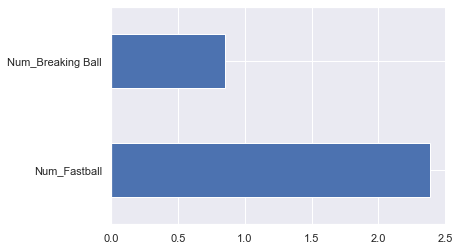

In [87]:
mean_stats[['Num_Fastball', 'Num_Breaking Ball']].plot(kind = 'barh')

In [151]:
# Function to visualize the pitch types for each permutation of handedness
def handedness_stats(hand_combo):
    mean_stats = handedness_group3.get_group(hand_combo).drop(columns = ['ab_id', 'event', 'inning']).mean()
    
    
    general_stats = mean_stats[['Num_Fastball', 
                                'Num_Breaking Ball', 
                                'Num_Changeup', 
                                'Num_Knuckleball', 
                                'Num_Intentional Ball',
                                'Num_Automatic Ball',
                                'Num_Strike',
                                'Num_Foul',
                                'Num_Ball',
                                'Num_Non-out',
                                'Num_Out']]
    
    fastball_stats = mean_stats[['Num_Fastball',
                                 'Num_Fastball_Strike',
                                 'Num_Fastball_Foul',
                                 'Num_Fastball_Ball',
                                 'Num_Fastball_Non-out',
                                 'Num_Fastball_Out']]
    
    breakingball_stats = mean_stats[['Num_Breaking Ball',
                                     'Num_Breaking Ball_Strike',
                                     'Num_Breaking Ball_Foul',
                                     'Num_Breaking Ball_Ball',
                                     'Num_Breaking Ball_Non-out',
                                     'Num_Breaking Ball_Out']]
    
    changeup_stats = mean_stats[['Num_Changeup',
                                 'Num_Changeup_Strike',
                                 'Num_Changeup_Foul',
                                 'Num_Changeup_Ball',
                                 'Num_Changeup_Non-out',
                                 'Num_Changeup_Out']]
    
    knuckleball_stats = mean_stats[['Num_Knuckleball',
                                    'Num_Knuckleball_Strike',
                                    'Num_Knuckleball_Foul',
                                    'Num_Knuckleball_Ball',
                                    'Num_Knuckleball_Non-out',
                                    'Num_Knuckleball_Out']]
    
    intentional_ball_stats = mean_stats[['Num_Intentional Ball',
                                         'Num_Intentional Ball_Strike',
                                         'Num_Intentional Ball_Foul',
                                         'Num_Intentional Ball_Ball',
                                         'Num_Intentional Ball_Non-out',
                                         'Num_Intentional Ball_Out']]
    
    automatic_ball_stats = mean_stats[['Num_Automatic Ball',
                                       'Num_Automatic Ball_Strike',
                                       'Num_Automatic Ball_Foul',
                                       'Num_Automatic Ball_Ball',
                                       'Num_Automatic Ball_Non-out',
                                       'Num_Automatic Ball_Out']]
    
    fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,15))
    general_stats.plot(kind = 'barh', ax = axes[0,0], title = hand_combo[0] + '-' + hand_combo[1] + ' Pitcher-Batter handedness General Pitch Statistics', color = 'k')
    fastball_stats.plot(kind = 'barh', ax = axes[0,1], title = hand_combo[0] + '-' + hand_combo[1] + ' Pitcher-Batter handedness Fastball Pitch Statistics', color = 'r')
    breakingball_stats.plot(kind = 'barh', ax = axes[1,0], title = hand_combo[0] + '-' + hand_combo[1] + ' Pitcher-Batter handedness Breakingball Pitch Statistics', color = 'c')
    changeup_stats.plot(kind = 'barh', ax = axes[1,1], title = hand_combo[0] + '-' + hand_combo[1] + ' Pitcher-Batter handedness Changeup Pitch Statistics', color = 'y')
    knuckleball_stats.plot(kind = 'barh', ax = axes[2,0], title = hand_combo[0] + '-' + hand_combo[1] + ' Pitcher-Batter handedness Knuckleball Pitch Statistics', color = 'g')
    intentional_ball_stats.plot(kind = 'barh', ax = axes[2,1], title = hand_combo[0] + '-' + hand_combo[1] + ' Pitcher-Batter handedness Intentional Ball Pitch Statistics', color = 'b')
    automatic_ball_stats.plot(kind = 'barh', ax = axes[3,0], title = hand_combo[0] + '-' + hand_combo[1] + ' Pitcher-Batter handedness Automatic Ball Pitch Statistics', color = 'm')
    
    fig.tight_layout(h_pad = 1, w_pad = 1)

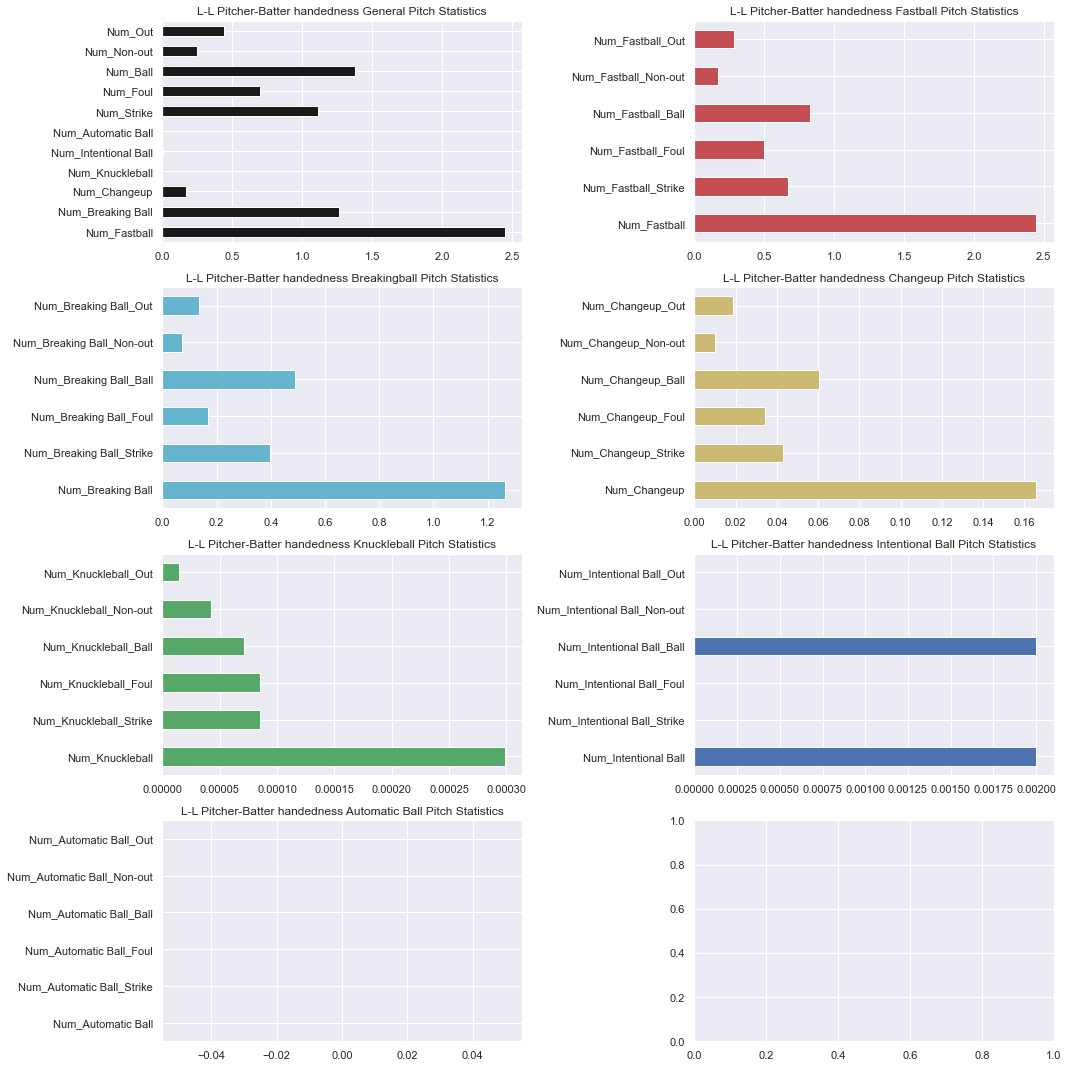

In [153]:
# Statistics for Left-handed Pitcher VS Left-handed Batter
handedness_stats(('L', 'L'))

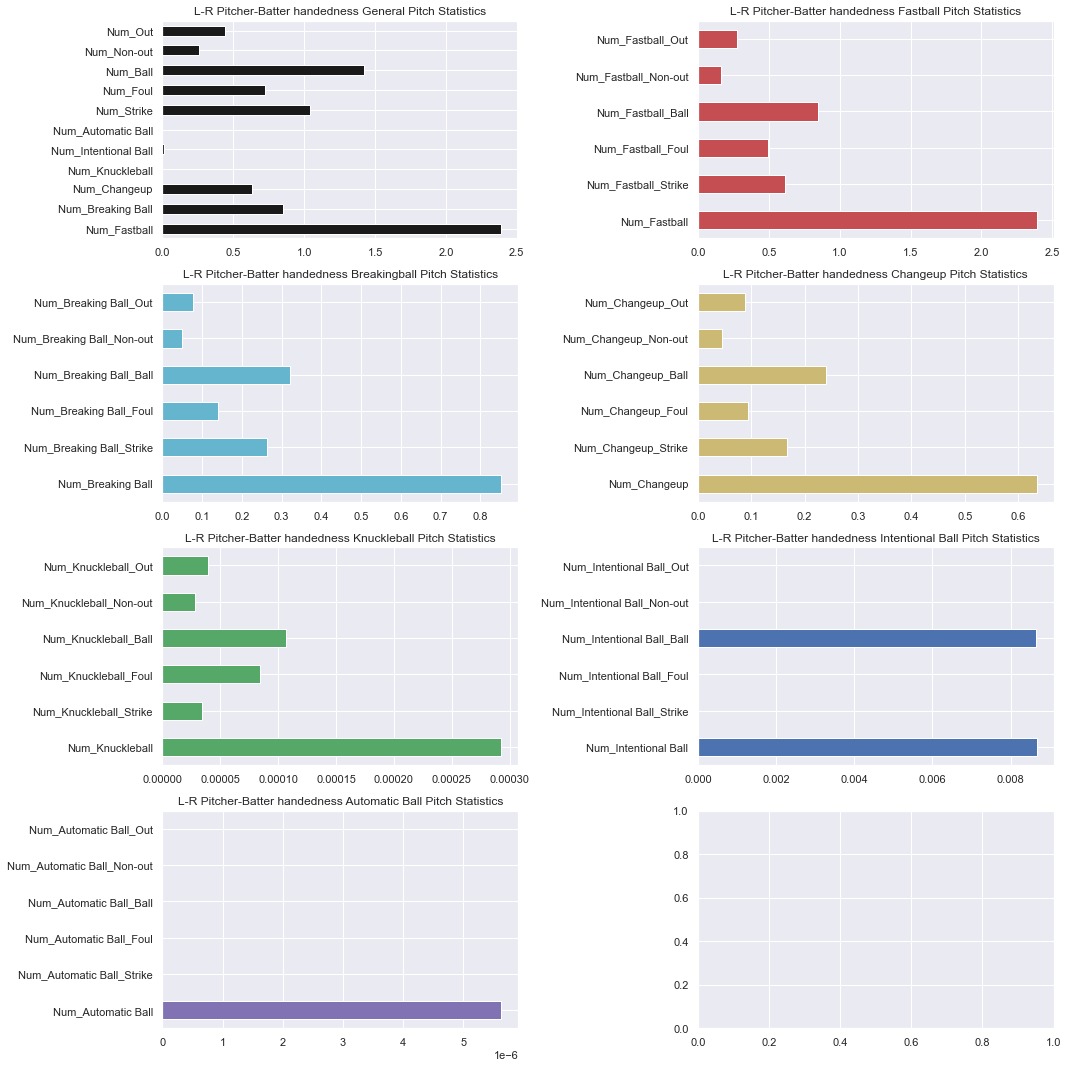

In [154]:
# Statistics for Left-Handed Pitcher VS Right-handed Batter
handedness_stats(('L', 'R'))

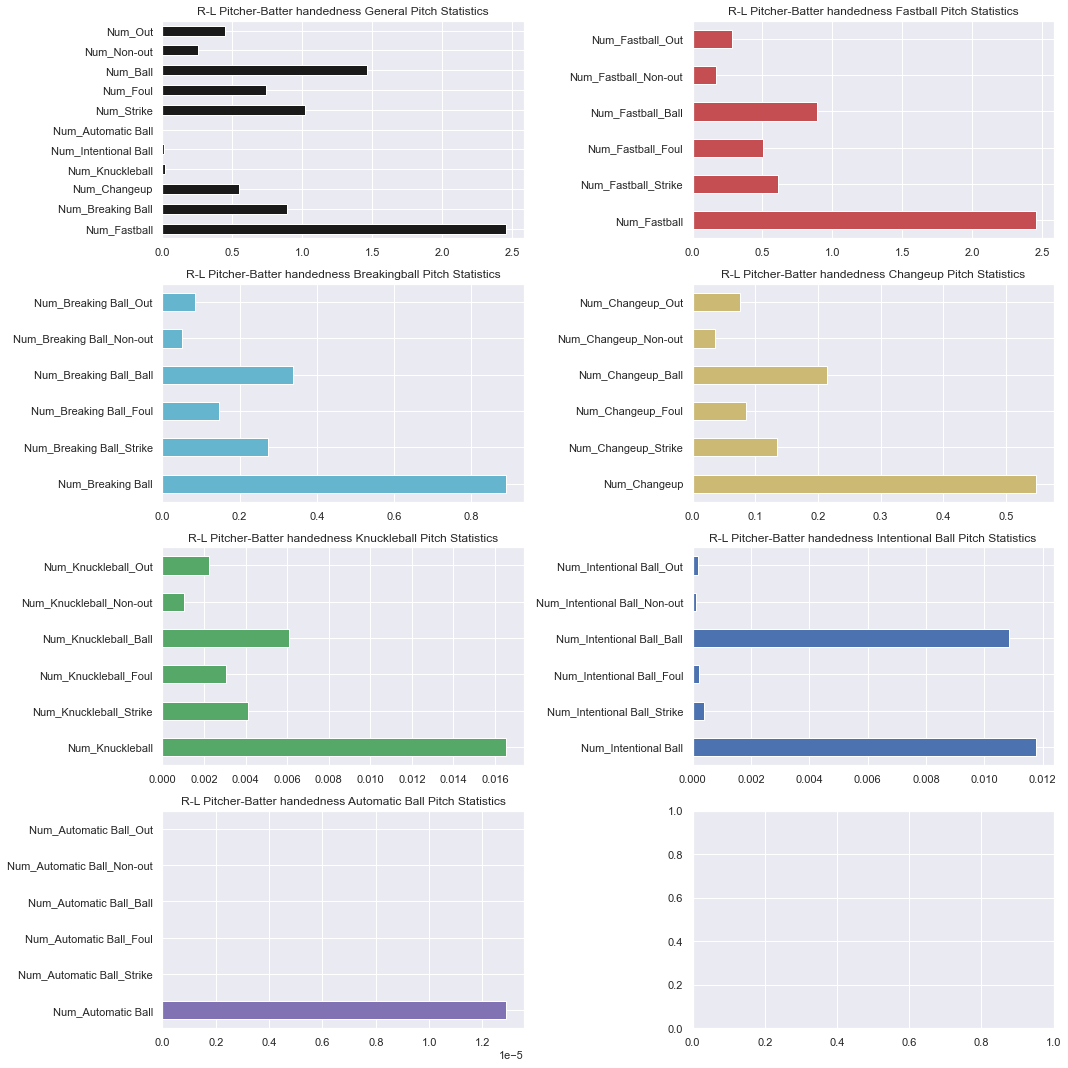

In [155]:
# Statistics for Right-Handed Pitcher VS Left-Handed Batter
handedness_stats(('R', 'L'))

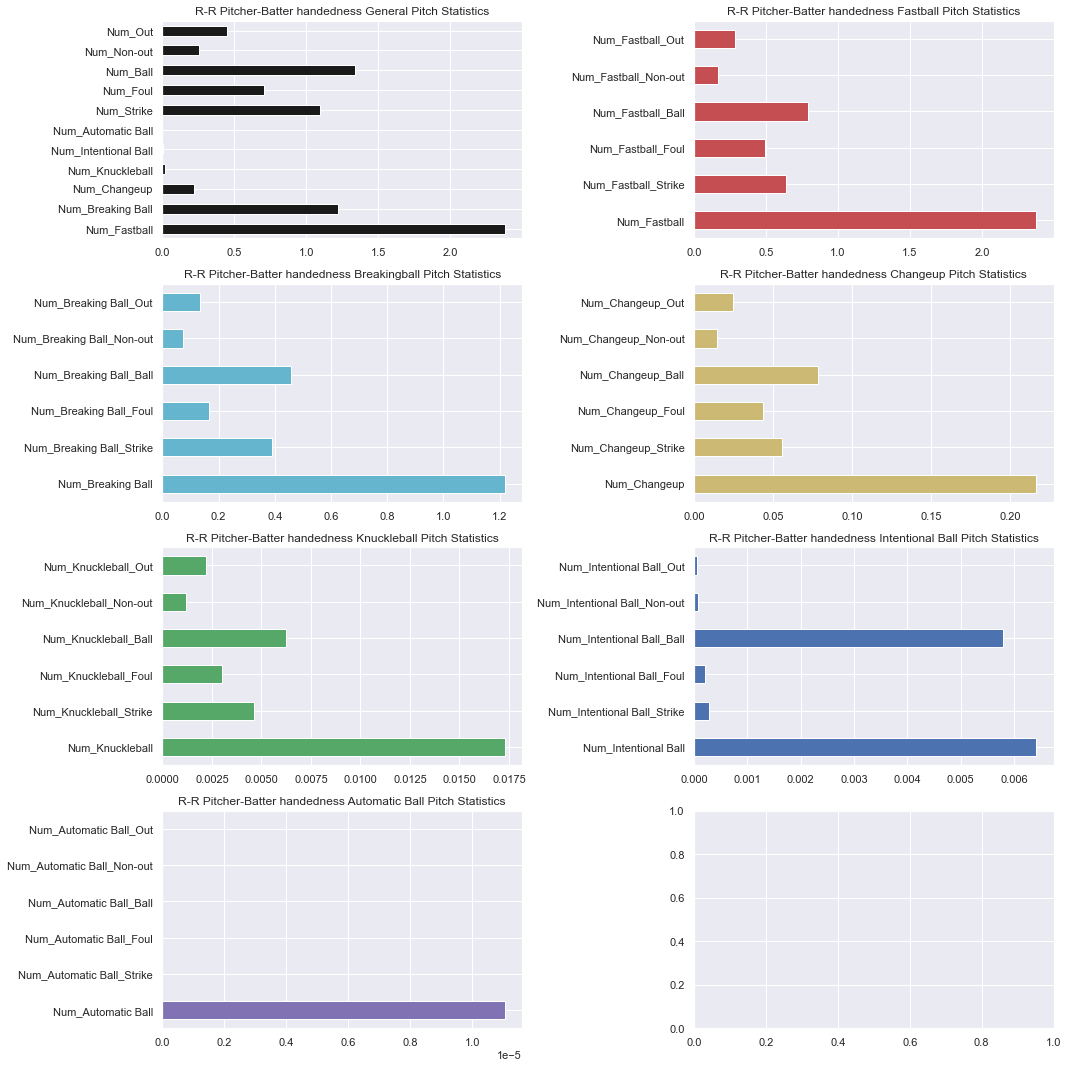

In [156]:
# Statistics for Right-Handed Pitcher VS Right-Handed Batter
handedness_stats(('R', 'R'))